<h1 style="text-align:center; color:black;">Heart Disease Prediction</h1>

<h2 >Goal of the Project</h2>

<p style="text-align:justify; color:black;">
The goal of this project is to develop a predictive model for heart disease of  individuals using Logistic Regression algorithm  based on their demographic and professional information. This project includes data preprocessing, exploratory data analysis (EDA), model building, and evaluation
</p>


## Work Overview

This notebook covers the following topics:

- Data Loading
- Data Exploration
- Univariate Analysis
- Multi-variate Analysis
- Data Cleaning
- Feture Selection
- Model Training and Evaluation
  


In [68]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import missingno as msno
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Data Loading

In [53]:
data = pd.read_csv("diabetes.csv")
data.head()

Age  Gender  Cholesterol  Blood Pressure  Heart Rate  Smoking  \
0   75  Female          228             119          66  Current   
1   48    Male          204             165          62  Current   
2   53    Male          234              91          67    Never   
3   69  Female          192              90          72  Current   
4   62  Female          172             163          93    Never   

  Alcohol Intake  Exercise Hours Family History Diabetes Obesity  \
0          Heavy               1             No       No     Yes   
1            NaN               5             No       No      No   
2          Heavy               3            Yes       No     Yes   
3            NaN               4             No      Yes      No   
4            NaN               6             No      Yes      No   

   Stress Level  Blood Sugar Exercise Induced Angina   Chest Pain Type  \
0             8          119                     Yes   Atypical Angina   
1             9           70                     Yes    Typical Angina   
2             5          196                     Yes   Atypical Angina   
3             7          107                     Yes  Non-anginal Pain   
4             2          183                     Yes      Asymptomatic   

   Heart Disease  
0              1  
1              0  
2              1  
3              0  
4              0

## <span >Dataset Description</span>

This dataset contains the following columns:

- **Age**: The age of the patient.
- **Gender**: The gender of the patient (1 = male; 0 = female).
- **Cholesterol**: Serum cholesterol in mg/dl.
- **Blood Pressure**: Resting blood pressure (in mm Hg on admission to the hospital).
- **Heart Rate**: Maximum heart rate achieved.
- **Smoking**: Smoking status of the patient (1 = smoker; 0 = non-smoker).
- **Alcohol Intake**: Alcohol intake status of the patient (1 = drinks alcohol; 0 = does not drink alcohol).
- **Exercise Hours**: Number of hours of exercise per week.
- **Family History**: Family history of heart disease (1 = yes; 0 = no).
- **Diabetes**: Diabetes status (1 = has diabetes; 0 = no diabetes).
- **Obesity**: Obesity status (1 = obese; 0 = not obese).
- **Stress Level**: Stress level of the patient (measured on a scale from 1 to 10).
- **Blood Sugar**: Blood sugar level in mg/dl.
- **Exercise Induced Angina**: Exercise-induced angina (1 = yes; 0 = no).
- **Chest Pain Type**: Type of chest pain experienced by the patient (1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptomatic).
- **Heart Disease**: Diagnosis of heart disease (0 = no; 1 = yes).


# Data Exploration

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1000 non-null   int64 
 1   Gender                   1000 non-null   object
 2   Cholesterol              1000 non-null   int64 
 3   Blood Pressure           1000 non-null   int64 
 4   Heart Rate               1000 non-null   int64 
 5   Smoking                  1000 non-null   object
 6   Alcohol Intake           660 non-null    object
 7   Exercise Hours           1000 non-null   int64 
 8   Family History           1000 non-null   object
 9   Diabetes                 1000 non-null   object
 10  Obesity                  1000 non-null   object
 11  Stress Level             1000 non-null   int64 
 12  Blood Sugar              1000 non-null   int64 
 13  Exercise Induced Angina  1000 non-null   object
 14  Chest Pain Type          1000 non-null   

In [4]:
data.shape

(1000, 16)

In [5]:
# Checking dublicated rows
data.duplicated().sum()

0

<div style="background-color: #e6f7ff; border-left: 6px solid #007bff; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0,0,0,0.1);">
    <strong style="color: #007bff;">Note:</strong> There are no duplicate rows.
</div>


<Axes: >

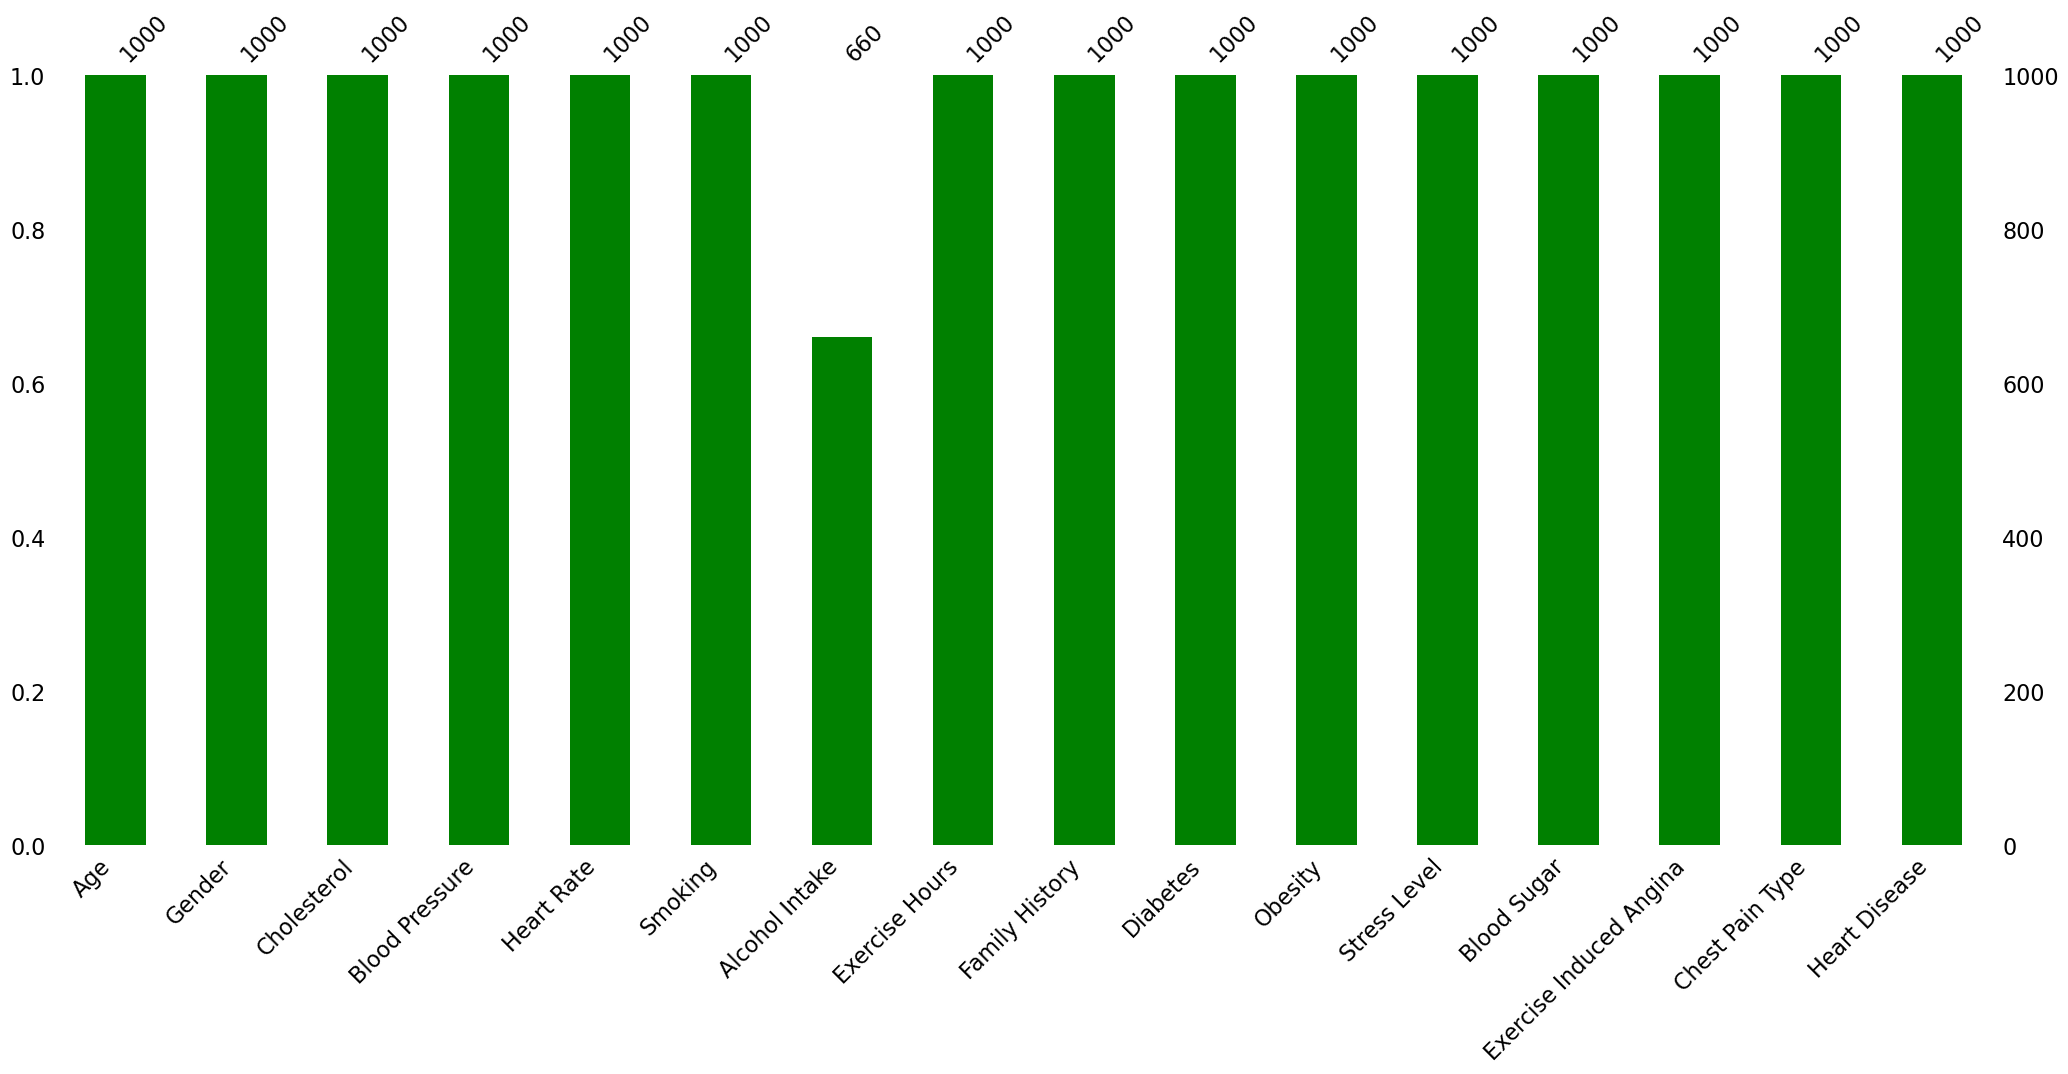

In [6]:
# Checking null values
msno.bar(data,color='g')

<div style="background-color: #e6f7ff; border-left: 6px solid #007bff; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0,0,0,0.1);">
    <strong style="color: #007bff;">Note:</strong> There are null values.
</div>


# Univariate Analysis

In [7]:
def categorical(category, title):
    cat = category.value_counts()
    fig = px.bar(
        x=cat.index, 
        y=cat.values,
        color=cat.index, 
        labels={"x": category.name, "y": "Counts"},
    )
    
    fig.update_layout(
        title_text=title,  # Set the title parameter here
        title_x=0.5,  # Center align the title
        title_font_size=25,  # Adjust title font size
        title_font_family='Arial',  # Adjust title font family
        title_font_color='black'  # Adjust title font color
    )
    
    fig.show()

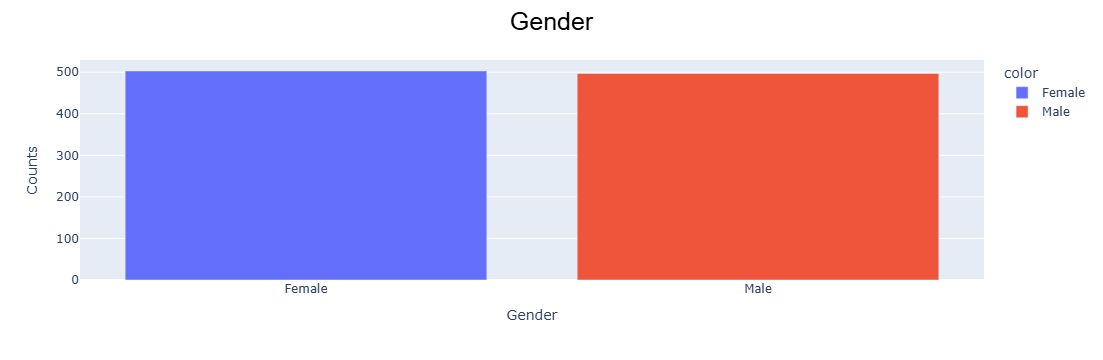

In [8]:
categorical(data["Gender"], "Gender")

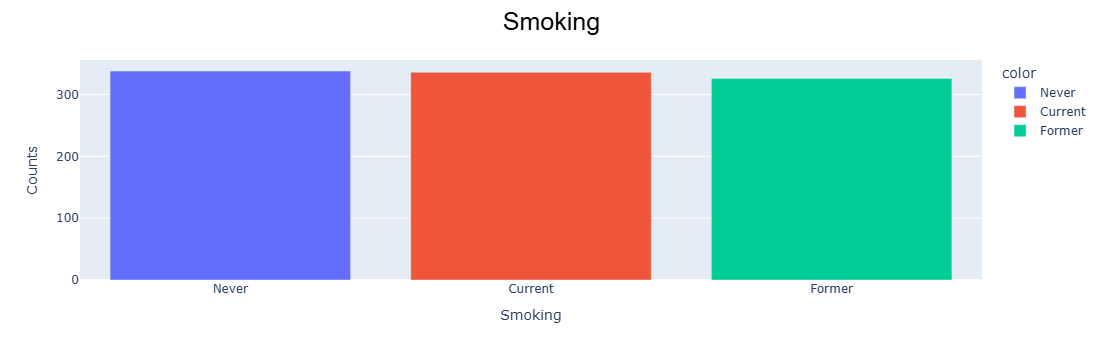

In [9]:
categorical(data["Smoking"], "Smoking")

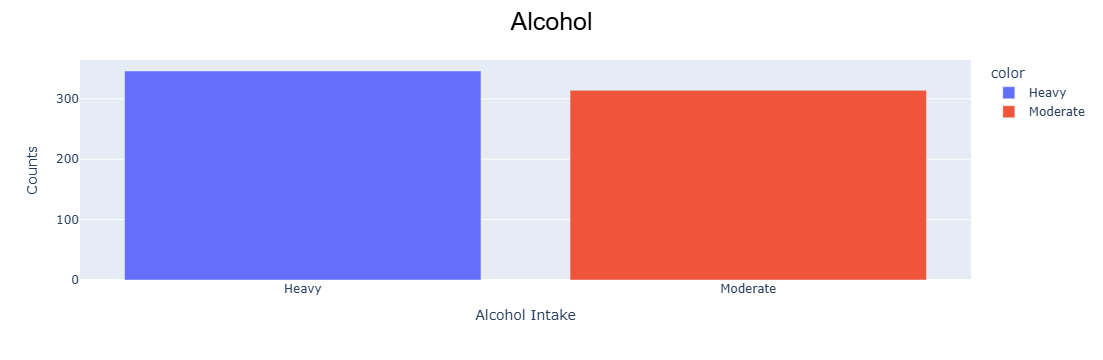

In [10]:
categorical(data["Alcohol Intake"], "Alcohol")

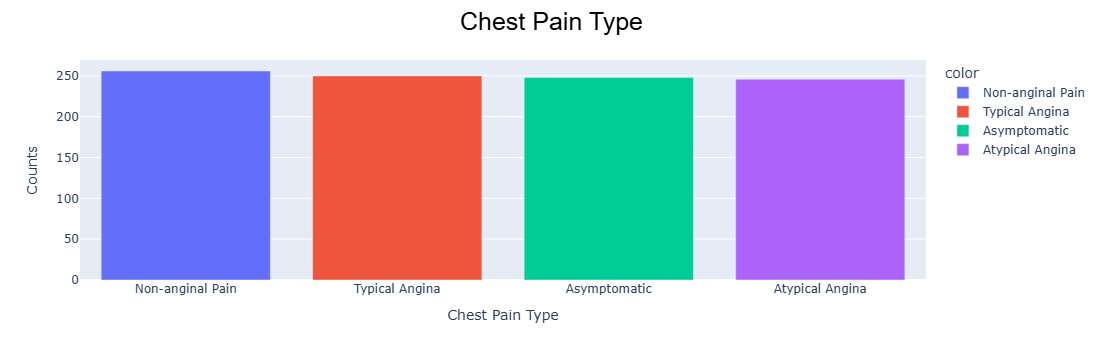

In [11]:
categorical(data["Chest Pain Type"], "Chest Pain Type")

In [12]:
def draw_pie_chart(column, title):
    values = column.value_counts()
    labels = values.index
    fig = px.pie(
        names=labels,
        values=values,
        title=title,
        labels={'names': column.name, 'values': 'Counts'},
        hole=0.4,  # Size of the hole in the middle of the pie chart (0 means no hole)
    )
    fig.update_traces(textposition='inside', textinfo='percent+label')
    fig.update_layout(
        title_x=0.5,  # Center align the title
        title_font_size=25,  # Adjust title font size if needed
        title_font_family='Arial',  # Adjust title font family if needed
        title_font_color='black'  # Adjust title font color if needed
    )
    fig.show()

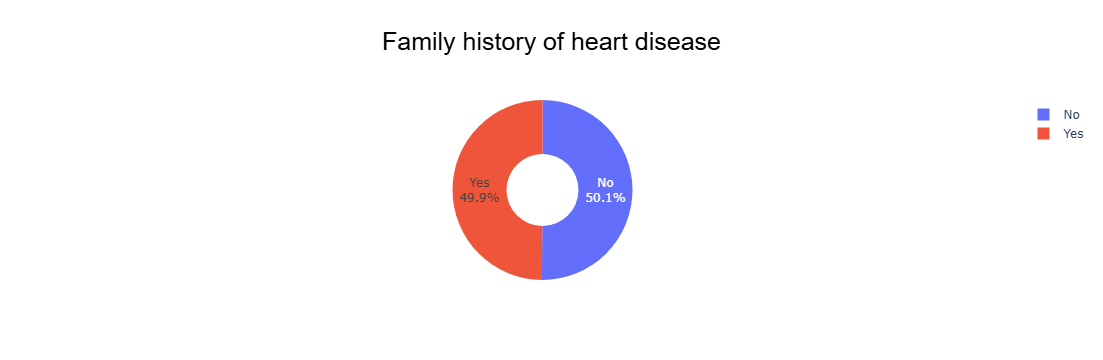

In [13]:
draw_pie_chart(data["Family History"], " Family history of heart disease")

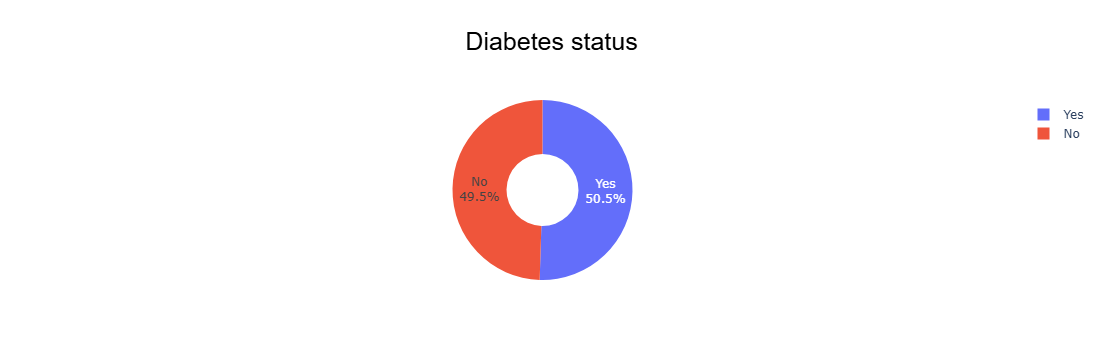

In [14]:
draw_pie_chart(data["Diabetes"], " Diabetes status")

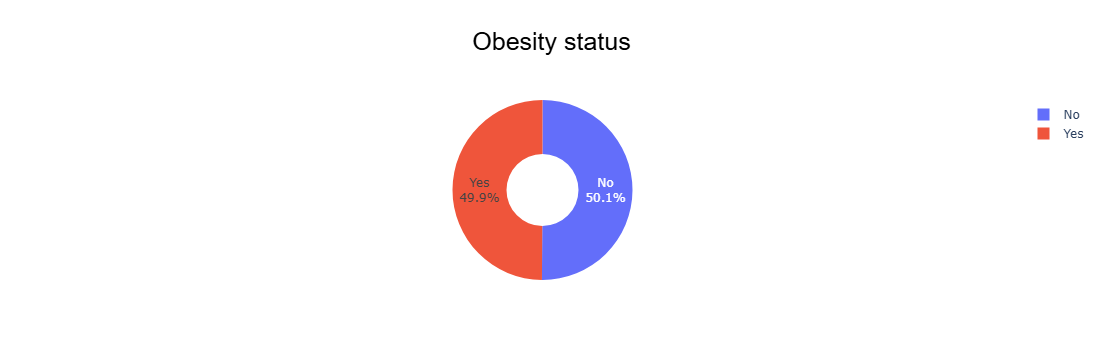

In [15]:
draw_pie_chart(data["Obesity"], " Obesity status")

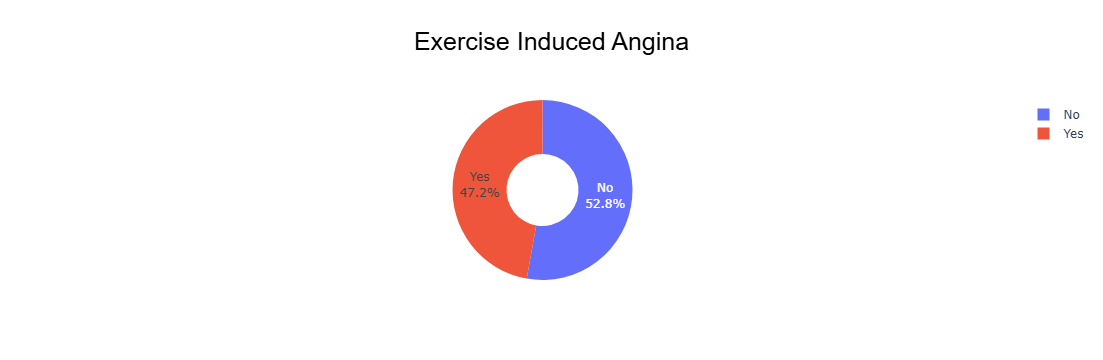

In [16]:
draw_pie_chart(data["Exercise Induced Angina"], " Exercise Induced Angina")

In [17]:
# Function to show distribution of numerical data
def histogram ( data , x,title):
    fig = px.histogram(data , x )
    fig.update_layout(
        title={
            'text': title,
            'y':0.95,
            'x':0.5,
            'font': dict(
                size=24,
            )
        }
    )
    fig.show()

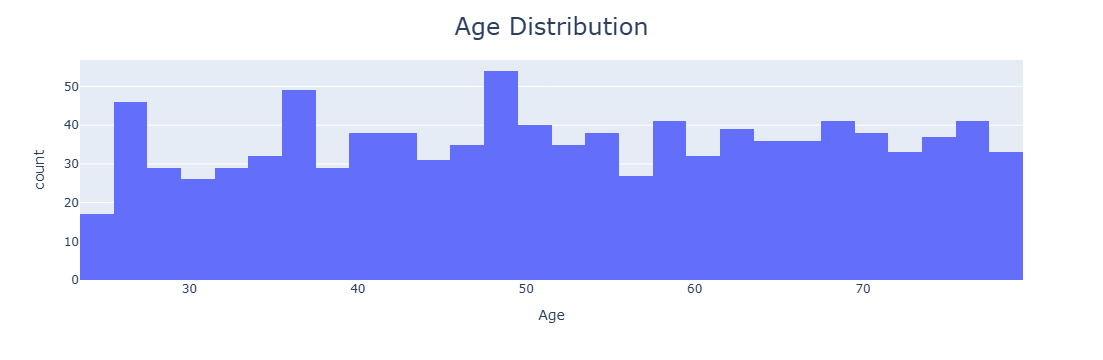

In [18]:
histogram(data , x = "Age", title="Age Distribution")

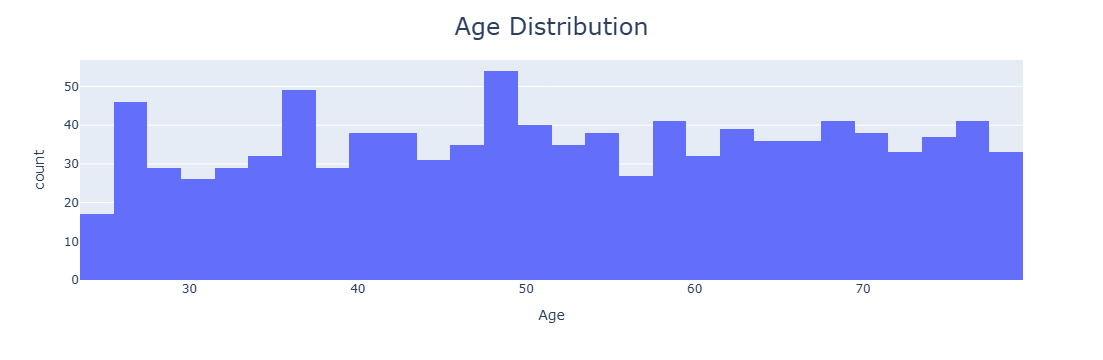

In [19]:
histogram(data , x = "Age", title="Age Distribution")

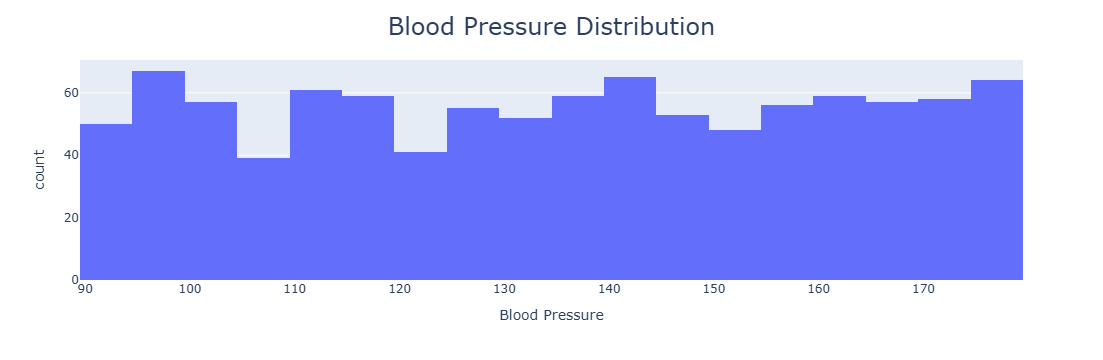

In [20]:
histogram(data , x = "Blood Pressure", title="Blood Pressure Distribution")

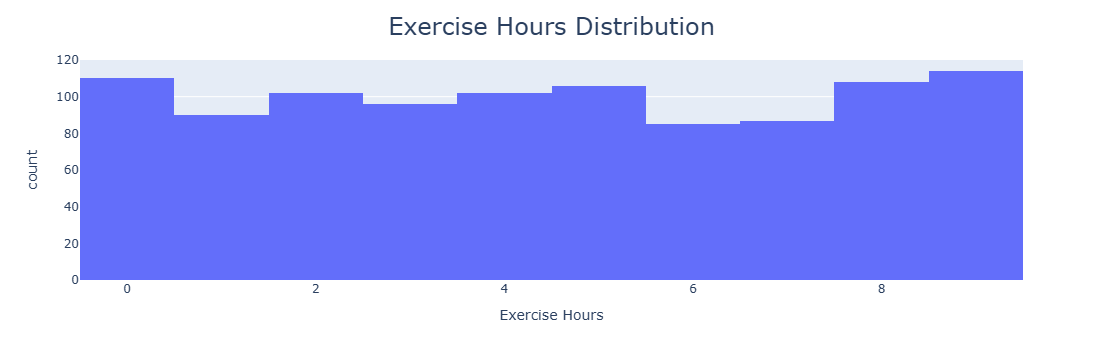

In [21]:
histogram(data , x = "Exercise Hours", title="Exercise Hours Distribution")

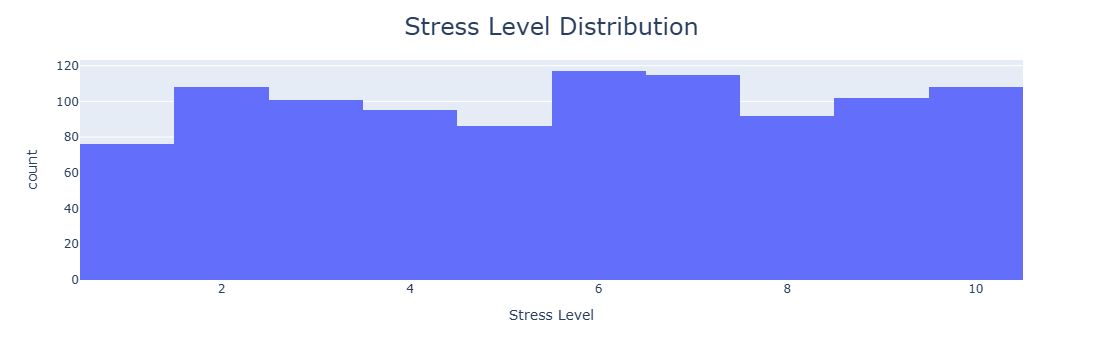

In [22]:
histogram(data , x = "Stress Level", title="Stress Level Distribution")

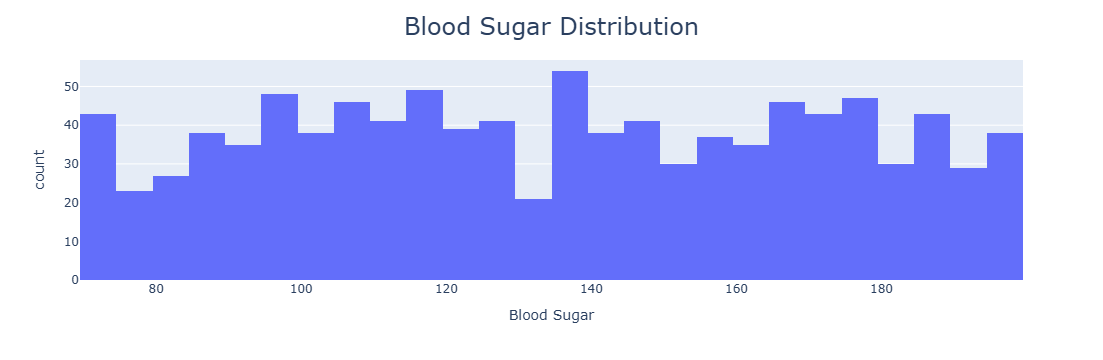

In [23]:
histogram(data , x = "Blood Sugar", title="Blood Sugar Distribution")

In [24]:
def draw_boxplots(data):
    # Filter numerical columns
    numerical_columns = data.select_dtypes(include=['number']).columns.tolist()
    
    # Initialize an empty figure
    fig = px.box()
    
    # Iterate through each numerical column
    for column in numerical_columns:
        # Add a vertical box plot for each numerical column
        fig.add_box(y=data[column], name=column, orientation='v')  # 'v' for vertical
        
    # Update layout and show the figure
    fig.update_layout(
        title=' Boxplots for Numerical Columns',
        xaxis_title='Columns',
        yaxis_title='Values',
        title_x=0.5,  # Center align the title
        title_font_size=20,  # Adjust title font size if needed
        title_font_family='Arial',  # Adjust title font family if needed
        title_font_color='black',  # Adjust title font color if needed
        boxmode='group',  # Display boxplots in grouped mode
        height=400,  # Adjust the height of the figure (in pixels)
        width=len(numerical_columns) * 150  # Adjust the width based on the number of columns
    )
    fig.show()

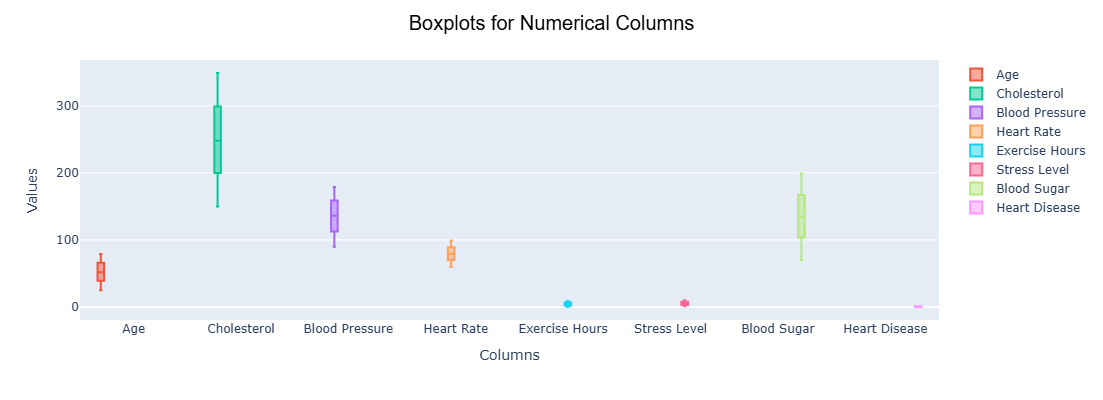

In [25]:
draw_boxplots(data)

# Multi-Variate Analysis

In [32]:
def multi_variate(data, feature_column, target_column, title):
    cat = data.groupby([feature_column, target_column]).size().reset_index(name='Counts')

    fig = px.bar(
        cat, 
        x=feature_column, 
        y='Counts',
        color=target_column,
        labels={feature_column: feature_column, 'Counts': 'Counts', target_column: target_column}
    )
    
    fig.update_layout(
        title_text=title,  # Set the title parameter here
        title_x=0.5,  # Center align the title
        title_font_size=25,  # Adjust title font size
        title_font_family='Arial',  # Adjust title font family
        title_font_color='black'  # Adjust title font color
    )
    
    fig.show() 

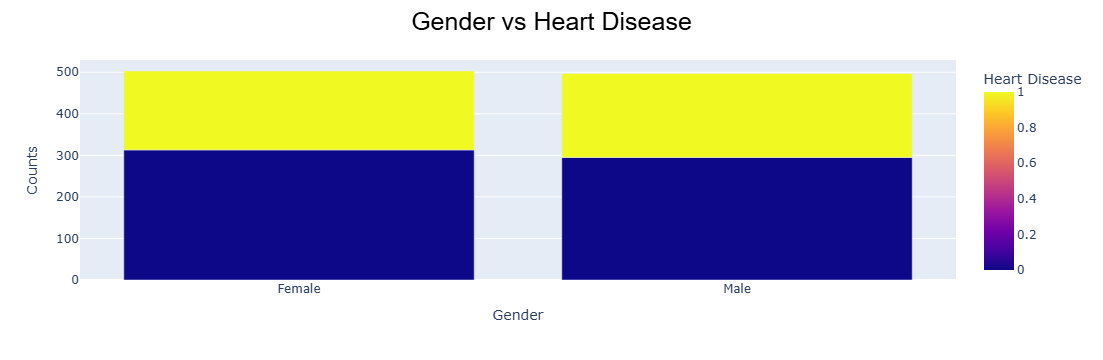

In [35]:
multi_variate(data, 'Gender', 'Heart Disease', 'Gender vs Heart Disease')

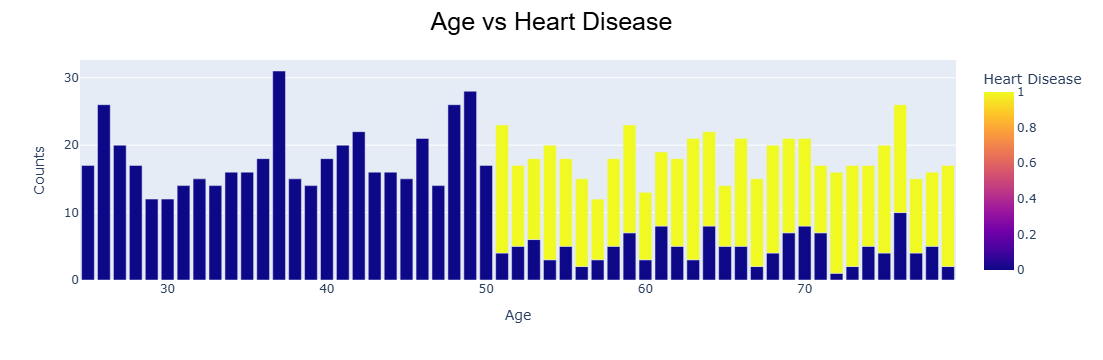

In [36]:
multi_variate(data, 'Age', 'Heart Disease', 'Age vs Heart Disease')

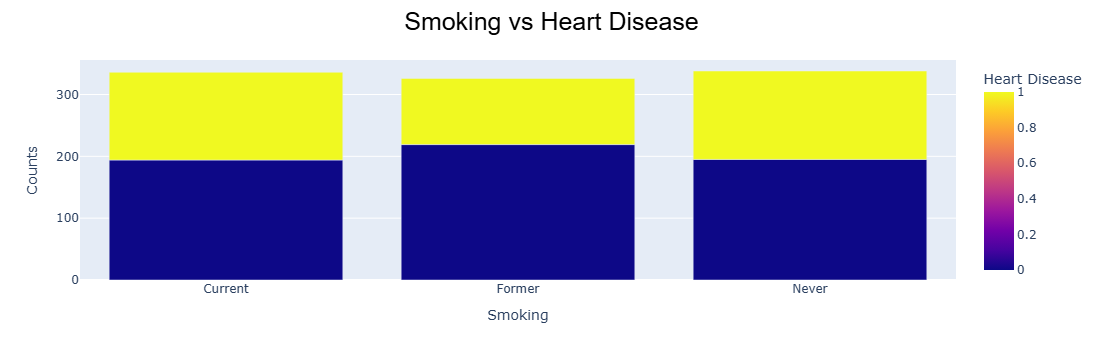

In [37]:
multi_variate(data, 'Smoking', 'Heart Disease', 'Smoking vs Heart Disease')

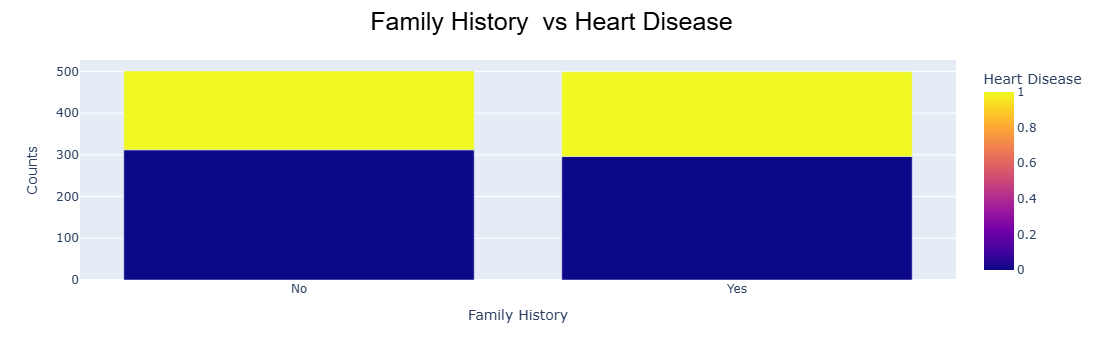

In [38]:
multi_variate(data, 'Family History', 'Heart Disease', 'Family History	 vs Heart Disease')

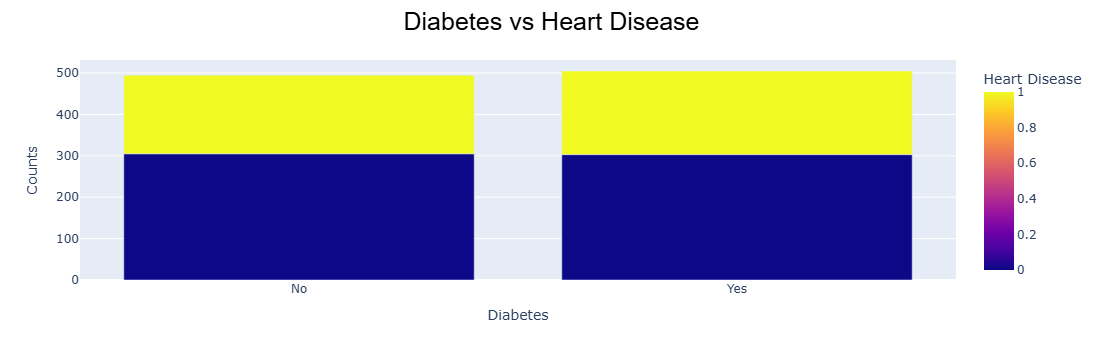

In [39]:
multi_variate(data, 'Diabetes', 'Heart Disease', 'Diabetes vs Heart Disease')

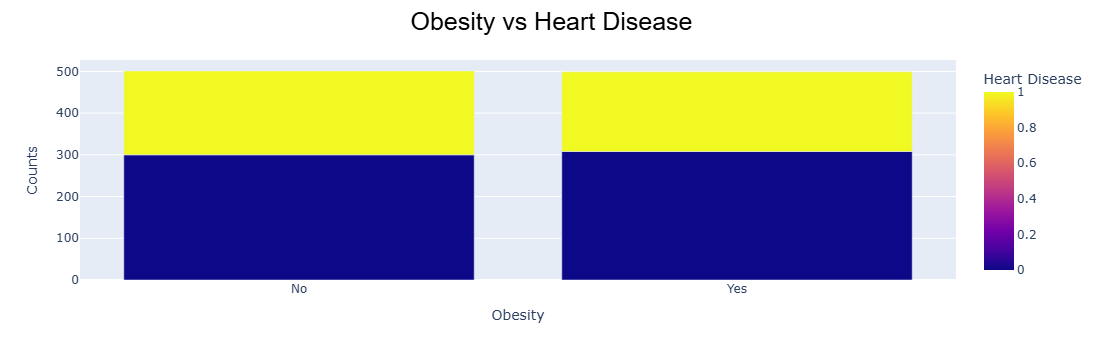

In [40]:
multi_variate(data, 'Obesity', 'Heart Disease', 'Obesity vs Heart Disease')

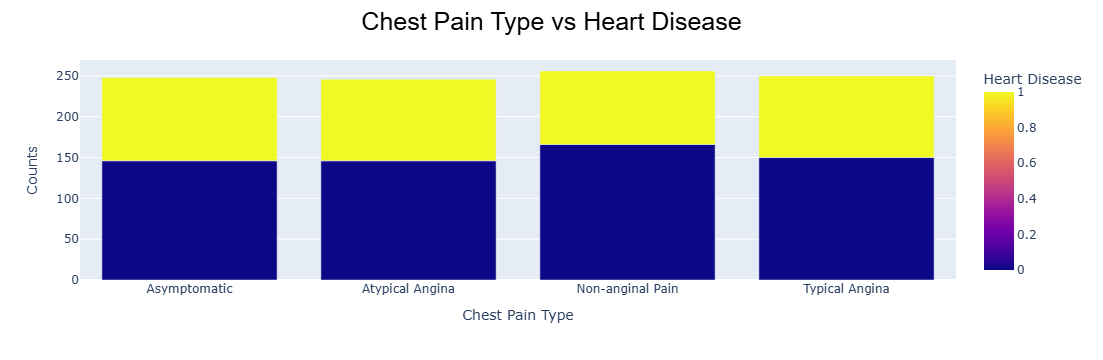

In [41]:
multi_variate(data, 'Chest Pain Type', 'Heart Disease', 'Chest Pain Type vs Heart Disease')

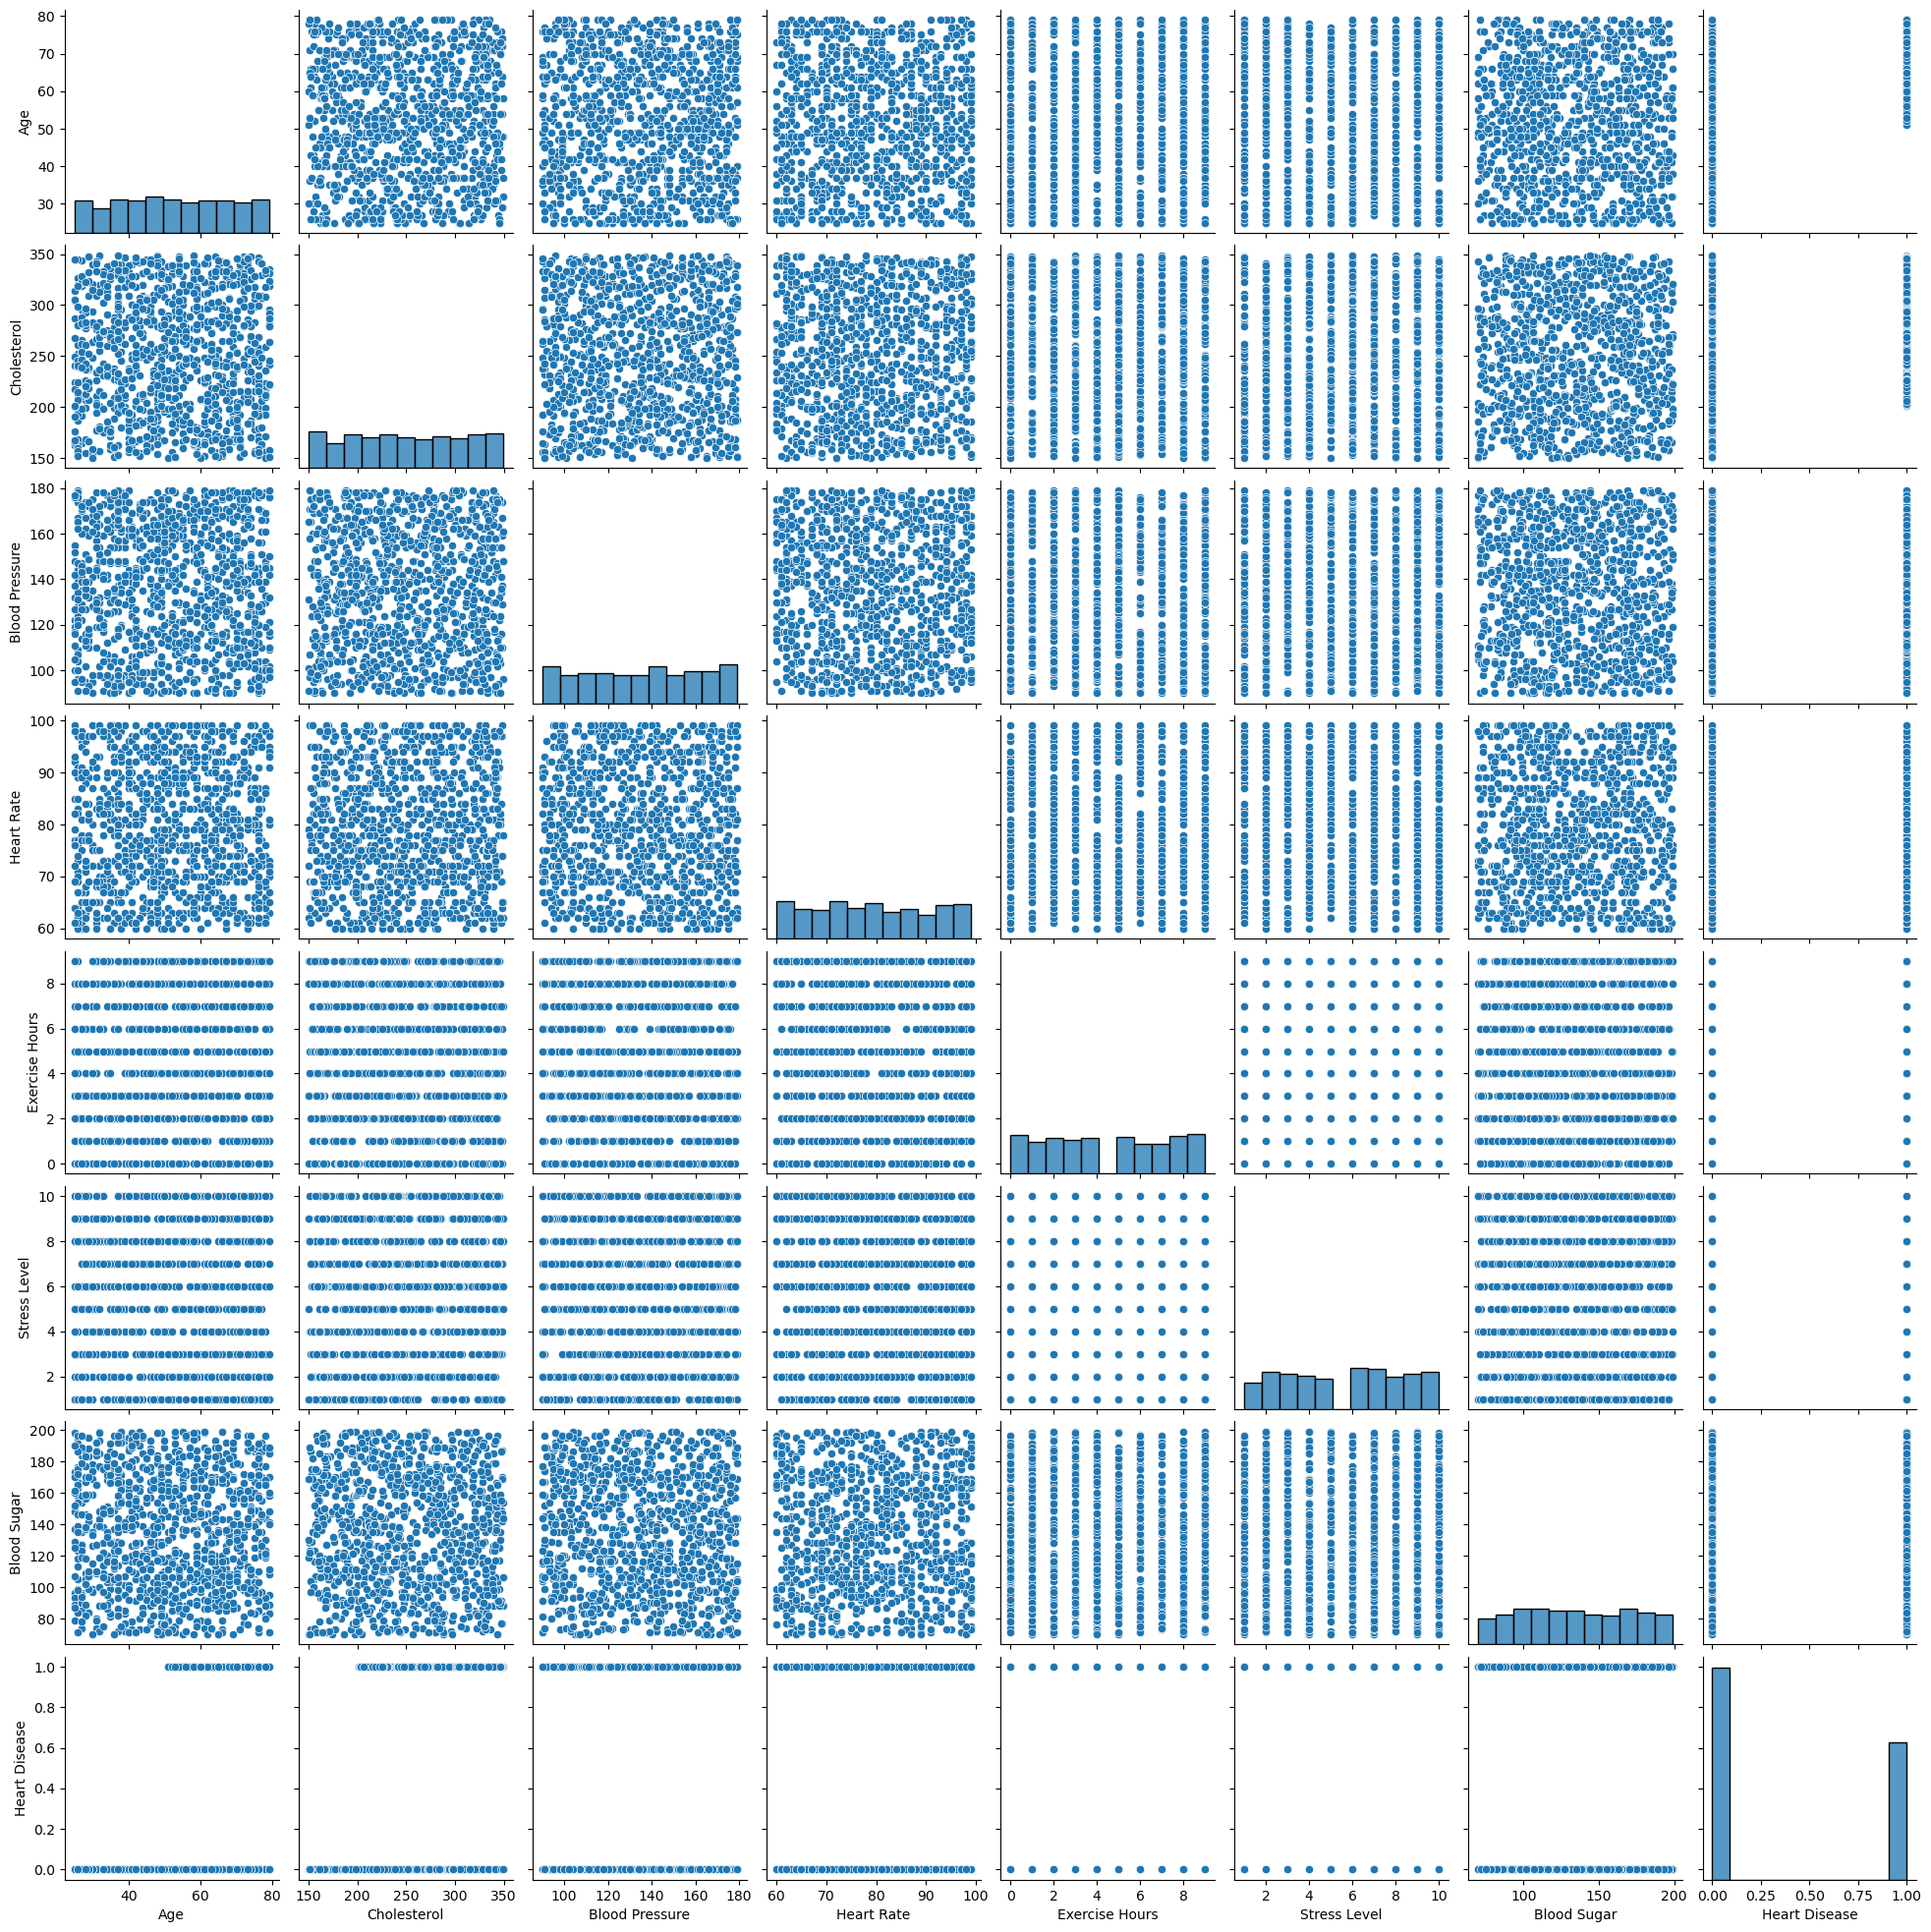

In [42]:
sns.pairplot(data)

# Data Cleaning

In [54]:
mode_value = data['Alcohol Intake'].mode()[0]
data['Alcohol Intake'].fillna(mode_value, inplace=True)

C:\Users\Mohamed\AppData\Local\Temp\ipykernel_5708\2537152575.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [56]:
def label_encode_categorical_columns(df):

    le = LabelEncoder()
    
    for column in df.columns:
        if df[column].dtype == 'object':
            df[column] = le.fit_transform(df[column])
    
    return df

In [57]:
data = label_encode_categorical_columns(data)

In [58]:
data.sample(5)

Age  Gender  Cholesterol  Blood Pressure  Heart Rate  Smoking  \
698   37       0          209              99          99        2   
892   53       1          257             112          69        1   
561   75       0          157              96          89        2   
225   33       1          315              91          80        0   
419   30       1          318             168          91        0   

     Alcohol Intake  Exercise Hours  Family History  Diabetes  Obesity  \
698               1               0               1         0        1   
892               1               5               1         0        1   
561               0               1               1         1        1   
225               0               5               0         1        0   
419               0               0               1         0        0   

     Stress Level  Blood Sugar  Exercise Induced Angina  Chest Pain Type  \
698             4           85                        0                0   
892             3           93                        1                1   
561             1          140                        1                0   
225             2          138                        0                3   
419             2          126                        0                3   

     Heart Disease  
698              0  
892              1  
561              0  
225              0  
419              0

In [59]:
data.isnull().sum()

Age                        0
Gender                     0
Cholesterol                0
Blood Pressure             0
Heart Rate                 0
Smoking                    0
Alcohol Intake             0
Exercise Hours             0
Family History             0
Diabetes                   0
Obesity                    0
Stress Level               0
Blood Sugar                0
Exercise Induced Angina    0
Chest Pain Type            0
Heart Disease              0
dtype: int64

# Feature Selection

In [60]:
correlation_matrix = data.corr()
correlation_matrix

Age    Gender  Cholesterol  Blood Pressure  \
Age                      1.000000  0.014044    -0.010673        0.002093   
Gender                   0.014044  1.000000    -0.012566       -0.023785   
Cholesterol             -0.010673 -0.012566     1.000000        0.021841   
Blood Pressure           0.002093 -0.023785     0.021841        1.000000   
Heart Rate               0.029027  0.014741    -0.008527       -0.001675   
Smoking                 -0.007562 -0.021911     0.015490       -0.017021   
Alcohol Intake           0.072372  0.025606     0.041173       -0.001081   
Exercise Hours          -0.021366 -0.024491     0.016124        0.011924   
Family History           0.017532  0.099990    -0.007862       -0.015410   
Diabetes                -0.011193 -0.039943    -0.028409       -0.065437   
Obesity                 -0.011096 -0.056013     0.002814       -0.037476   
Stress Level            -0.045555  0.029643     0.090458        0.002257   
Blood Sugar             -0.041676  0.069209     0.002484       -0.053516   
Exercise Induced Angina -0.022848  0.005673     0.037989        0.005496   
Chest Pain Type         -0.012074  0.009898    -0.071472        0.005613   
Heart Disease            0.646871  0.029399     0.365041        0.006900   

                         Heart Rate   Smoking  Alcohol Intake  Exercise Hours  \
Age                        0.029027 -0.007562        0.072372       -0.021366   
Gender                     0.014741 -0.021911        0.025606       -0.024491   
Cholesterol               -0.008527  0.015490        0.041173        0.016124   
Blood Pressure            -0.001675 -0.017021       -0.001081        0.011924   
Heart Rate                 1.000000  0.015235        0.015755       -0.013541   
Smoking                    0.015235  1.000000        0.008850       -0.003347   
Alcohol Intake             0.015755  0.008850        1.000000       -0.015506   
Exercise Hours            -0.013541 -0.003347       -0.015506        1.000000   
Family History             0.024774 -0.021920       -0.024503        0.029344   
Diabetes                   0.006268  0.034083       -0.011075       -0.041700   
Obesity                   -0.039685 -0.014612        0.065992       -0.006118   
Stress Level              -0.040504  0.017524       -0.008257       -0.006957   
Blood Sugar                0.010240 -0.026927        0.016067       -0.034503   
Exercise Induced Angina    0.005359  0.007457       -0.022478        0.067149   
Chest Pain Type            0.001277 -0.016386        0.008663        0.055373   
Heart Disease              0.013209  0.000539        0.061400       -0.014226   

                         Family History  Diabetes   Obesity  Stress Level  \
Age                            0.017532 -0.011193 -0.011096     -0.045555   
Gender                         0.099990 -0.039943 -0.056013      0.029643   
Cholesterol                   -0.007862 -0.028409  0.002814      0.090458   
Blood Pressure                -0.015410 -0.065437 -0.037476      0.002257   
Heart Rate                     0.024774  0.006268 -0.039685     -0.040504   
Smoking                       -0.021920  0.034083 -0.014612      0.017524   
Alcohol Intake                -0.024503 -0.011075  0.065992     -0.008257   
Exercise Hours                 0.029344 -0.041700 -0.006118     -0.006957   
Family History                 1.000000  0.020021  0.011996      0.047813   
Diabetes                       0.020021  1.000000  0.004020     -0.079329   
Obesity                        0.011996  0.004020  1.000000      0.039331   
Stress Level                   0.047813 -0.079329  0.039331      1.000000   
Blood Sugar                   -0.034381 -0.007754 -0.035853     -0.007918   
Exercise Induced Angina        0.001891 -0.073559 -0.002115     -0.002061   
Chest Pain Type                0.015244  0.018743  0.022411      0.027809   
Heart Disease                  0.030283  0.016552 -0.018878      0.007071   

                         Blood Sugar  Exercise In

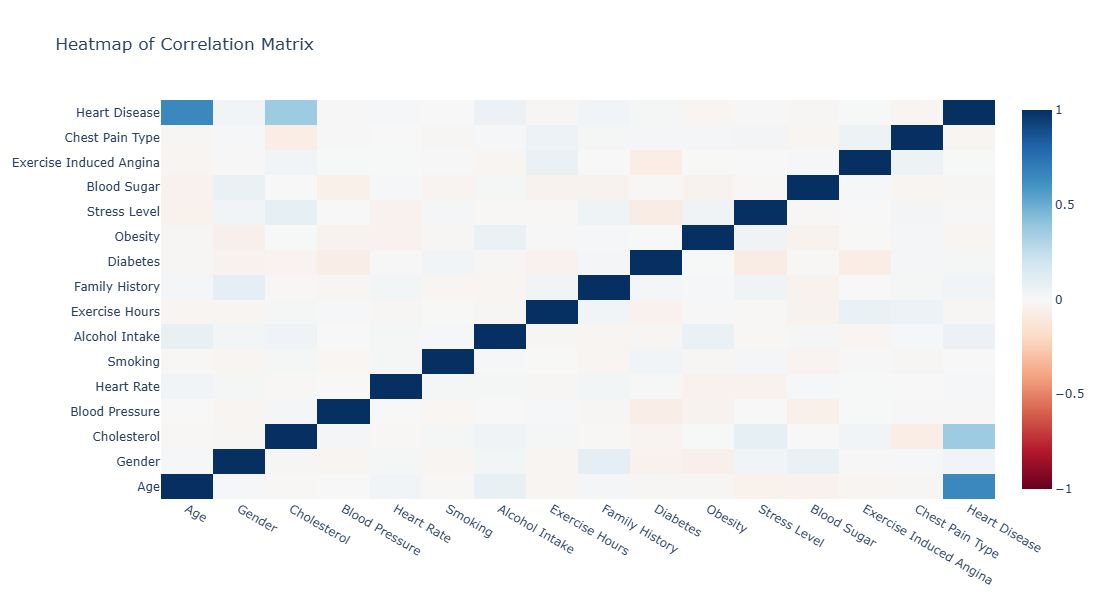

In [61]:
fig = go.Figure(data=go.Heatmap(
    z=correlation_matrix.values,
    x=correlation_matrix.columns,
    y=correlation_matrix.columns,
    colorscale='RdBu',
    zmin=-1, zmax=1
))

fig.update_layout(
    title='Heatmap of Correlation Matrix',
    xaxis_nticks=36,
    width=600,
    height=600,
    margin=dict(l=100, r=100, t=100, b=100)
)

fig.show()


In [62]:
x = data.drop('Heart Disease', axis=1)
x

Age  Gender  Cholesterol  Blood Pressure  Heart Rate  Smoking  \
0     75       0          228             119          66        0   
1     48       1          204             165          62        0   
2     53       1          234              91          67        2   
3     69       0          192              90          72        0   
4     62       0          172             163          93        2   
..   ...     ...          ...             ...         ...      ...   
995   56       0          269             111          86        2   
996   78       0          334             145          76        2   
997   79       1          151             179          81        2   
998   60       0          326             151          68        1   
999   53       1          226             116          82        0   

     Alcohol Intake  Exercise Hours  Family History  Diabetes  Obesity  \
0                 0               1               0         0        1   
1                 0               5               0         0        0   
2                 0               3               1         0        1   
3                 0               4               0         1        0   
4                 0               6               0         1        0   
..              ...             ...             ...       ...      ...   
995               0               5               0         1        1   
996               0               6               0         0        0   
997               1               4               1         0        1   
998               0               8               1         1        0   
999               0               6               0         0        1   

     Stress Level  Blood Sugar  Exercise Induced Angina  Chest Pain Type  
0               8          119                        1                1  
1               9           70                        1                3  
2               5          196                        1                1  
3               7          107                        1                2  
4               2          183                        1                0  
..            ...          ...                      ...              ...  
995            10          120                        0                2  
996            10          196                        1                3  
997             8          189                        1                0  
998             5          174                        1                1  
999             5          161                        1                0  

[1000 rows x 15 columns]

In [63]:
y = data['Heart Disease']
y

0      1
1      0
2      1
3      0
4      0
      ..
995    1
996    1
997    0
998    1
999    1
Name: Heart Disease, Length: 1000, dtype: int64

In [66]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [67]:
print(f'The shape of X train{x_train.shape}')
print(f'The shape of Y train{y_train.shape}')
print(f'The shape of X test{x_test.shape}')
print(f'The shape of Y test{y_test.shape}')

The shape of X train(800, 15)
The shape of Y train(800,)
The shape of X test(200, 15)
The shape of Y test(200,)


# Model Training and Evaluation

In [69]:
model = DecisionTreeClassifier(random_state=42)

In [71]:
model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [73]:
y_pred = model.predict(x_test)

In [74]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 1.0
Confusion Matrix:
[[118   0]
 [  0  82]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       118
           1       1.00      1.00      1.00        82

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



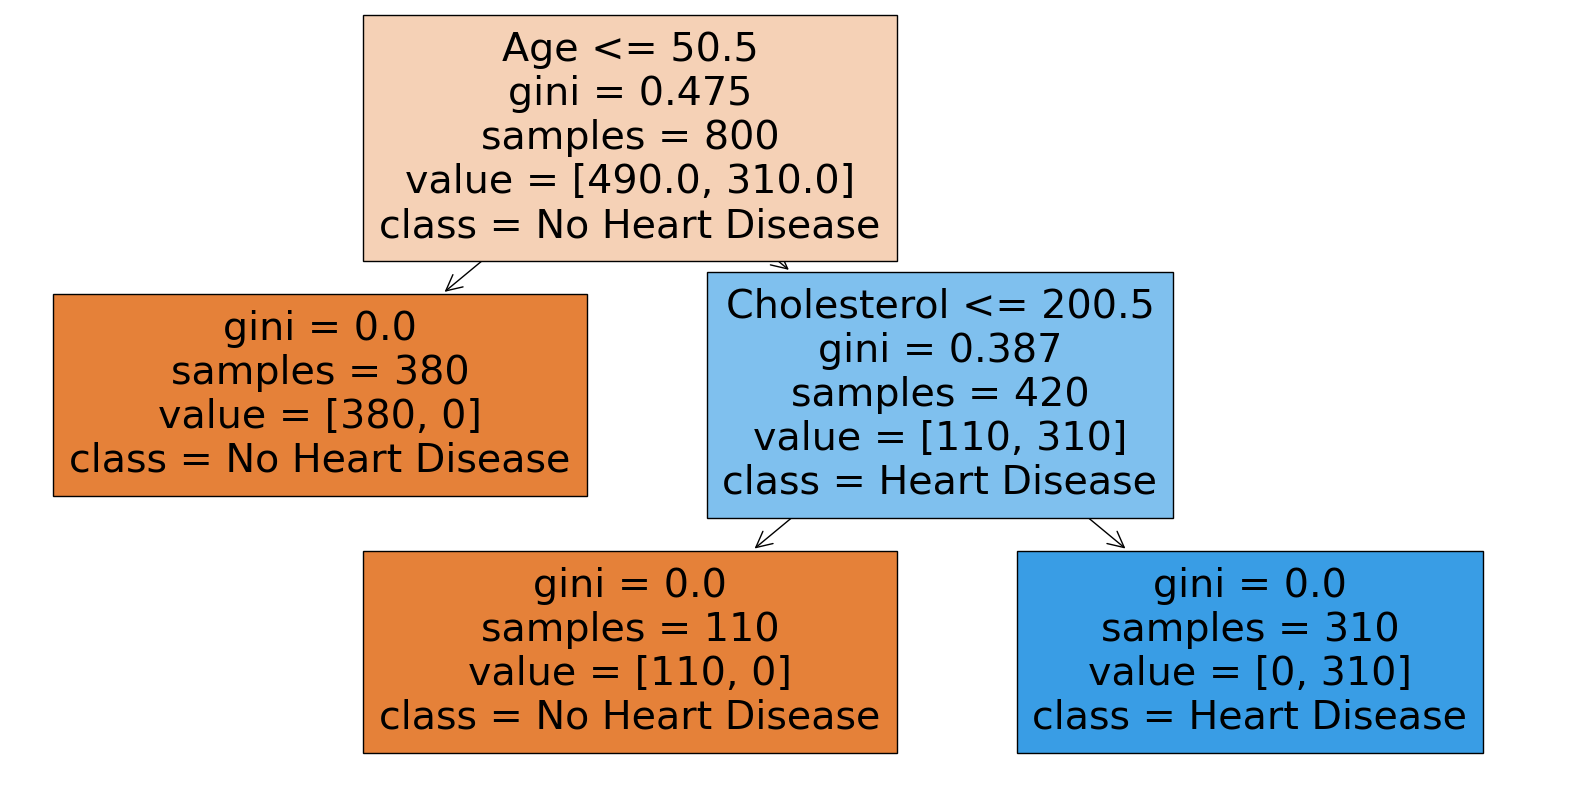

In [75]:
plt.figure(figsize=(20,10))
plot_tree(model, filled=True, feature_names=x.columns, class_names=['No Heart Disease', 'Heart Disease'])
plt.show()